In [73]:
#Locate the data, prepare for import of the MPT file
#Import necessary packaging
from utils.tools import *
path=r"C:\Users\cjang\Desktop\impedance_data\data\\"
data = ['DE_40__60.mpt']
ex_mpt = mpt_data(path,data)

In [74]:
import sys

def guesser(ex_mpt, Rs_guess = 1, R_guess = 1, n_guess = 0.8, fs_guess = 1, R2_guess = 1, n2_guess = 0.8, fs2_guess = 0.2):
    
    params = Parameters()
    guess_package = [Rs_guess, R_guess, n_guess, fs_guess, R2_guess, n2_guess, fs2_guess]
    #adding to the parameters package to send to the fitting function
    params.add('Rs', value=guess_package[0], min=guess_package[0]*.01, max=10**6)
    params.add('R', value=guess_package[1], min=guess_package[1]*.1, max=10**6)
    params.add('n', value=guess_package[2], min=.65, max=1)
    params.add('fs', value=guess_package[3], min=10**0.5, max=10**6)
    params.add('R2', value=guess_package[4], min=guess_package[4]*.1, max=10**6)
    params.add('n2', value=guess_package[5], min=.65, max=1)
    params.add('fs2', value=guess_package[6], min=10**-2, max=10**6)
    ex_mpt.mpt_fit(params, circuit = 'R-RQ-RQ')

    counter = 0

    
    
    
    while ex_mpt.low_error >= 100 and counter <= 100:
        
        try:
            counter += 1
            print('ITERATION NO. : ', counter)
            Rs_guess = ex_mpt.fit_Rs[0]

            R_guess = ex_mpt.fit_R[0]
            n_guess = ex_mpt.fit_n[0]
            fs_guess = ex_mpt.fit_fs[0]

            R2_guess = ex_mpt.fit_R2[0]
            n2_guess = ex_mpt.fit_n2[0]
            fs2_guess = ex_mpt.fit_fs2[0]

            guess_package = [Rs_guess, R_guess, n_guess, fs_guess, R2_guess, n2_guess, fs2_guess]
            #adding to the parameters package to send to the fitting function
            params = Parameters()
            params.add('Rs', value=guess_package[0], min=guess_package[0]*.01, max=guess_package[0]*100)
            params.add('R', value=guess_package[1], min=guess_package[1]*.1, max=guess_package[1]*10)
            params.add('n', value=guess_package[2], min=.65, max=1)
            params.add('fs', value=guess_package[3], min=10**0.5, max=10**6)
            params.add('R2', value=guess_package[4], min=guess_package[4]*.1, max=guess_package[4]*10)
            params.add('n2', value=guess_package[5], min=.65, max=1)
            params.add('fs2', value=guess_package[6], min=10**-2, max=10**1)
            ex_mpt.mpt_fit(params, circuit = 'R-RQ-RQ')

       
        except KeyboardInterrupt:
            print('Interrupted!!')
            print([ex_mpt.fit_Rs[0],ex_mpt.fit_R[0],ex_mpt.fit_n[0],ex_mpt.fit_Q[0],ex_mpt.fit_R2[0],ex_mpt.fit_n2[0],ex_mpt.fit_Q2[0]])
            
    ex_mpt.set_new_gph_dims(50,50)
    ex_mpt.mpt_plot(fitting = 'on')

No handles with labels found to put in legend.


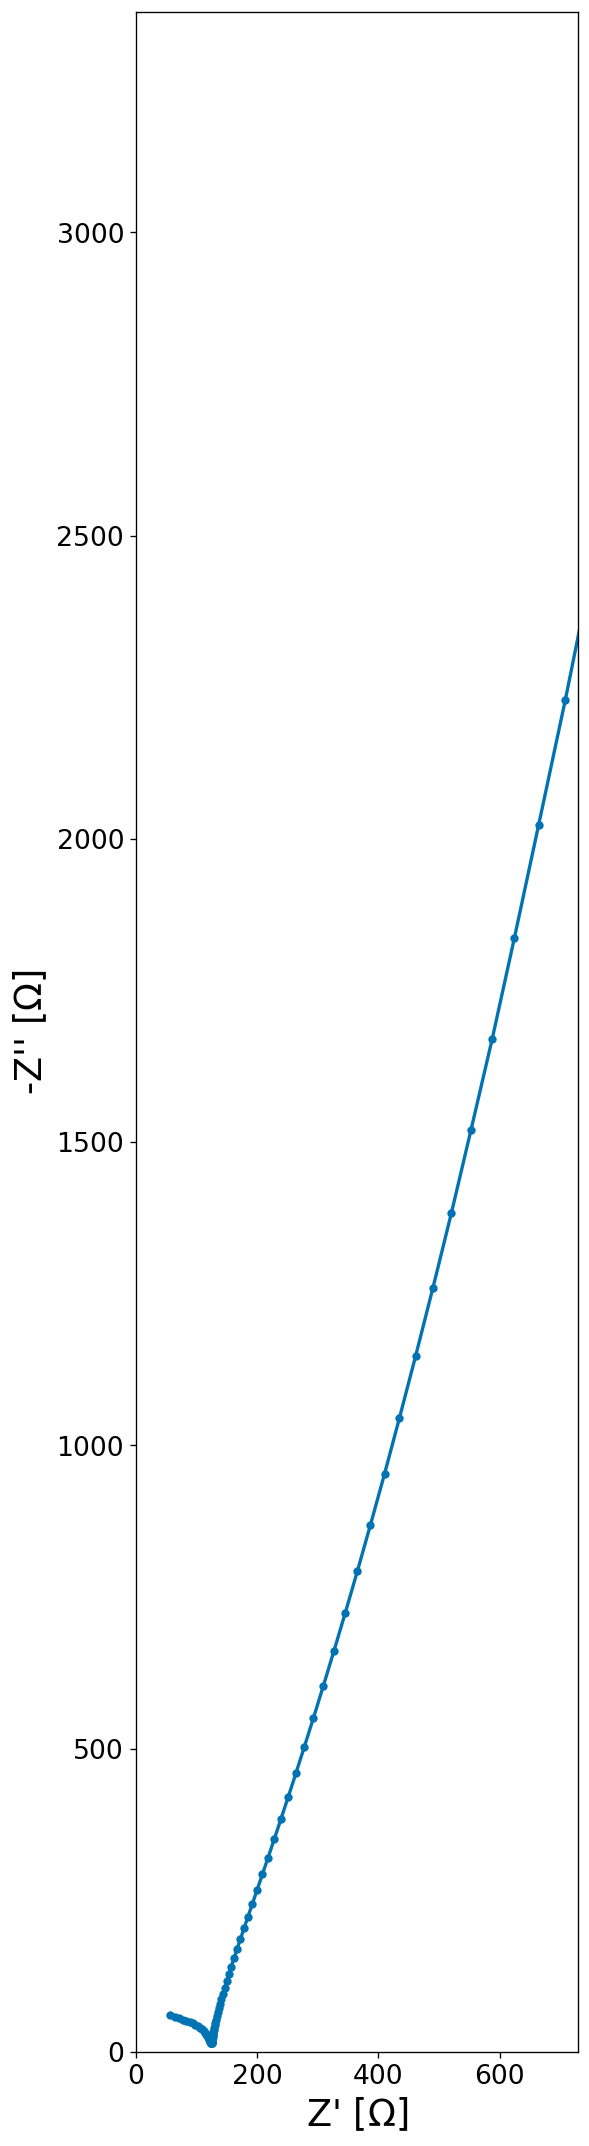

In [75]:
ex_mpt.set_new_gph_dims(50,50)
ex_mpt.mpt_plot(x_window = [0, mean(ex_mpt.df_raw['re']/2)], y_window = [0, mean(ex_mpt.df_raw['im'])/2])

In [76]:
skeleton = ex_mpt.df_raw.iloc[:,0:3]
re_mid, im_mid  = mean(skeleton['re']), mean(skeleton['im'])
a = skeleton[abs(skeleton['re']) <= re_mid]
b = skeleton[abs(skeleton['im']) <= im_mid]
c = pd.concat([a, b]).drop_duplicates()
for cols in c.columns.tolist()[1:]:
    c = c.ix[c[cols] > 0]
c

C:\Users\cjang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


,f,re,im
0,1.000019e+06,56.862843,61.688557
1,8.912467e+05,63.966206,58.204247
2,7.943327e+05,70.763611,55.586605
3,7.079498e+05,77.040985,53.435379
4,6.309568e+05,83.068130,51.515491
...,...,...,...
92,2.510444e+01,1119.958500,4451.878900
93,2.238539e+01,1199.797100,4921.781700
94,1.995530e+01,1287.690600,5445.095700
95,1.779613e+01,1382.166000,6024.817400


In [77]:
for i in pd.cut(c['re'], 10):
    print(i)

(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 199.956]
(55.432, 1

In [78]:
for i in pd.cut(c['im'], 10):
    print(i)

(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.127]
(7.516, 680.12

In [79]:
d = c[(c['re'] >=55.432) & (c['re'] <= 199.956)]
f = d[(d['im'] >=7.516) & (d['im'] <= 680.127)]
[max(f['f']), min(f['f'])]

[1000018.6, 891.42657]

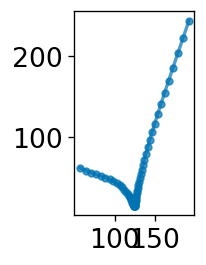

In [80]:
colors = sns.color_palette("colorblind", n_colors=len(ex_mpt.df))
colors_real = sns.color_palette("Blues", n_colors=len(ex_mpt.df)+2)
colors_imag = sns.color_palette("Oranges", n_colors=len(ex_mpt.df)+2)

fig = figure(figsize=(6, 8), dpi=120, facecolor='w', edgecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, hspace=0.5, bottom=0.1, top=0.95)
ax = fig.add_subplot(311, aspect='equal')


### Nyquist Plot
ax.plot(f['re'], f['im'], marker='o', ms=4, lw=2, color=colors[0], ls='-', alpha=.7)

No handles with labels found to put in legend.


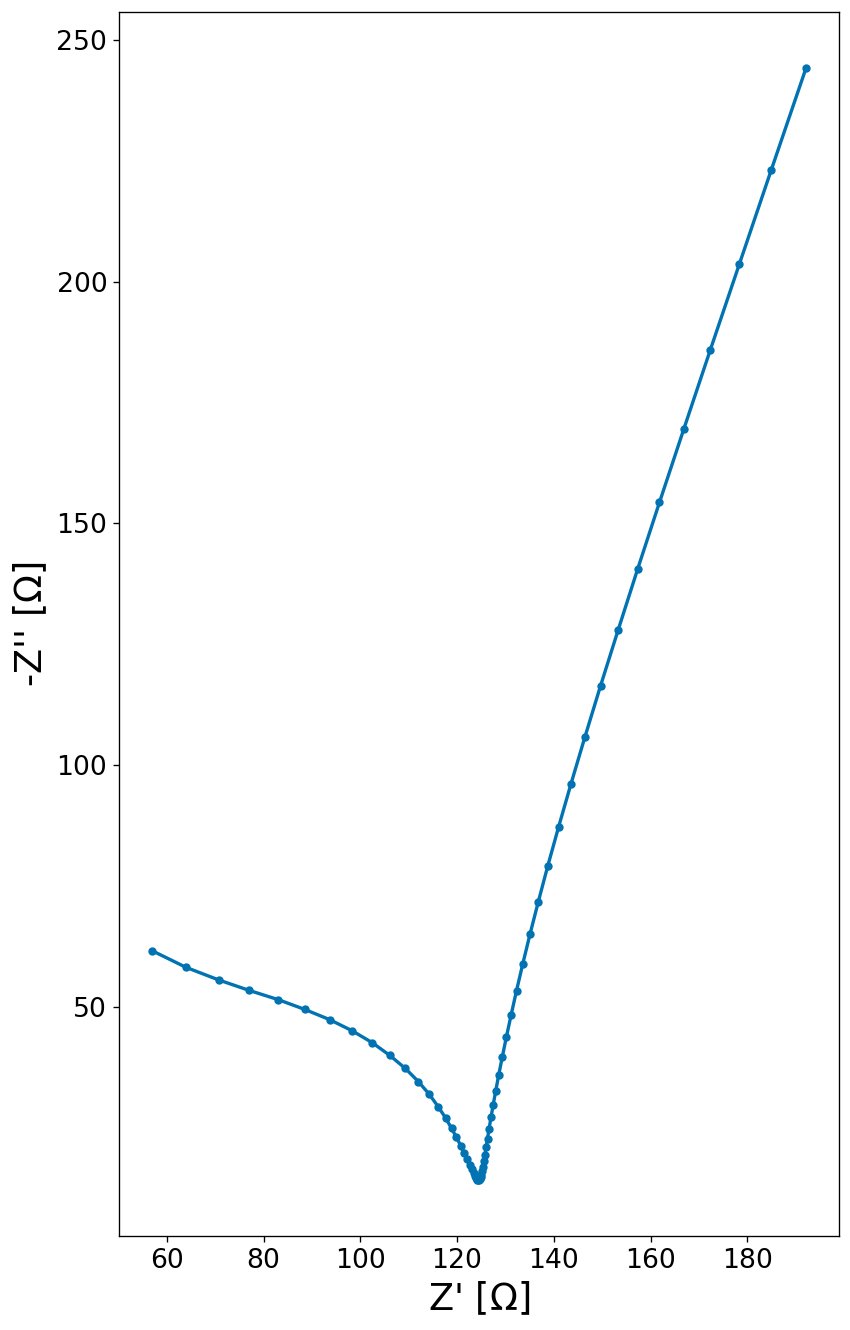

In [81]:
masked_mpt = mpt_data(path,data, mask = [max(f['f']), min(f['f'])])
masked_mpt.set_new_gph_dims(30,30)
masked_mpt.mpt_plot()

ERROR:  1388782.8253652817
ERROR:  1388782.8253652817
ERROR:  1388782.8253652817
ERROR:  1388782.4661043135
ERROR:  1388782.8244300655
ERROR:  1388782.825365396
ERROR:  1388782.8253652807
ERROR:  1388782.825262644
ERROR:  1388782.8253652991
ERROR:  1388782.8251764984
ERROR:  138375856276189.56
ERROR:  38312649589173.23
ERROR:  39091116792219.61
ERROR:  43883177464070.445
ERROR:  2430428182.9202914
ERROR:  2430428192.9644876
ERROR:  2430428315.0661206
ERROR:  2430428182.96957
ERROR:  2430428302.7432694
ERROR:  2430428992.3998346
ERROR:  2430428775.8962398
ERROR:  2430428682.7999034
ERROR:  158200607.20905647
ERROR:  158200609.91508967
ERROR:  158200621.14687338
ERROR:  158200607.20986453
ERROR:  158200610.02748597
ERROR:  158200723.22046426
ERROR:  158200650.25389394
ERROR:  158200642.1067321
ERROR:  12437667.072462793
ERROR:  12437667.554258432
ERROR:  12437671.279954817
ERROR:  12437667.07486388
ERROR:  12437663.958376292
ERROR:  12437685.333345106
ERROR:  12437670.970846428
ERROR:  1

ERROR:  275.2925562538597
ERROR:  274.44320592352756
ERROR:  274.4435882633597
ERROR:  274.44295606848124
ERROR:  274.443204027896
ERROR:  274.3187684515724
ERROR:  274.44317463291435
ERROR:  274.44424661808665
ERROR:  274.44345322304656
ERROR:  273.77286540495066
ERROR:  273.77325859070226
ERROR:  273.77265608369595
ERROR:  273.77286718540796
ERROR:  273.6485177633407
ERROR:  273.77283526330825
ERROR:  273.7738960818792
ERROR:  273.7731180640821
ERROR:  273.0875495249484
ERROR:  273.08798331549997
ERROR:  273.0874916111432
ERROR:  273.08754785819116
ERROR:  272.9631808753227
ERROR:  273.08752091677513
ERROR:  273.08856126645384
ERROR:  273.0878117626841
ERROR:  272.4319766517641
ERROR:  272.43243431214165
ERROR:  272.4320078346933
ERROR:  272.4319782247561
ERROR:  272.3076457266085
ERROR:  272.43194944757204
ERROR:  272.4329753366503
ERROR:  272.43224611005945
ERROR:  271.6125150619163
ERROR:  271.6125150619163
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals  

ERROR:  269.603650780926
ERROR:  269.6036487572299
ERROR:  269.6543949886075
ERROR:  269.6492898472166
ERROR:  269.64927200214254
ERROR:  269.6492214515802
ERROR:  269.64928949796507
ERROR:  269.64928858941005
ERROR:  269.6492841818164
ERROR:  269.64929186738107
ERROR:  269.6492898640845
ERROR:  269.62073119717485
ERROR:  269.6207133891586
ERROR:  269.6206629973767
ERROR:  269.62073085354854
ERROR:  269.6207299257344
ERROR:  269.6207255190978
ERROR:  269.6207332187923
ERROR:  269.6207311967936
ERROR:  269.63711097924124
ERROR:  269.63629699700425
ERROR:  269.63629699700425
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 226
    # data points      = 124
    # variables        = 7
    chi-square         = 0.07798516
    reduced chi-square = 6.6654e-04
    Akaike info crit   = -900.068261
    Bayesian info crit = -880.326290
[[Variables]]
    Rs:   2.25395195 +/- 1.89927886 (84.26%) (init = 11.40154)
    R:    118.911814 +/- 2.18847591 (1.84%) (init = 125.9961

ERROR:  269.6362969970001
ERROR:  269.6362969970001
ERROR:  269.6362969970001
ERROR:  269.63628954880716
ERROR:  269.6362319996543
ERROR:  269.6362966503925
ERROR:  269.63629771988883
ERROR:  269.636266115687
ERROR:  269.6362990170815
ERROR:  269.6362969925271
ERROR:  319171.3182637755
ERROR:  358666.4331292392
ERROR:  151021.56538511778
ERROR:  354201.7937181504
ERROR:  18897.470761226283
ERROR:  274.64724721711184
ERROR:  269.65873444507326
ERROR:  269.6362969970001
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 124
    # variables        = 7
    chi-square         = 0.07798516
    reduced chi-square = 6.6654e-04
    Akaike info crit   = -900.068261
    Bayesian info crit = -880.326290
[[Variables]]
    Rs:   2.25395195 +/- 1.89421455 (84.04%) (init = 2.253952)
    R:    118.911814 +/- 2.18024696 (1.83%) (init = 118.9118)
    n:    0.98262266 +/- 0.01049735 (1.07%) (init = 0.9826227)
    fs:   954913.041 +/- 15911.1214 (1.67%)

ERROR:  350849.6576769237
ERROR:  18720.085256969327
ERROR:  274.6060155656065
ERROR:  269.65860354292477
ERROR:  269.63629699699965
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 124
    # variables        = 7
    chi-square         = 0.07798516
    reduced chi-square = 6.6654e-04
    Akaike info crit   = -900.068261
    Bayesian info crit = -880.326290
[[Variables]]
    Rs:   2.25395195 +/- 1.89404709 (84.03%) (init = 2.253952)
    R:    118.911814 +/- 2.17993537 (1.83%) (init = 118.9118)
    n:    0.98262266 +/- 0.01049552 (1.07%) (init = 0.9826227)
    fs:   954913.041 +/- 15910.4905 (1.67%) (init = 954913)
    R2:   11439.0775 +/- 4102.88411 (35.87%) (init = 11439.08)
    n2:   0.84473035 +/- 0.00484590 (0.57%) (init = 0.8447304)
    fs2:  9.99999928 +/- 4.51662940 (45.17%) (init = 9.999999)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(Rs, R)   = -0.991
    C(R, n)    = -0.974
    C(R

ERROR:  269.6362969925262
ERROR:  308303.67095181555
ERROR:  351886.5579185334
ERROR:  152320.31438660348
ERROR:  354114.21189932263
ERROR:  18892.532365858024
ERROR:  274.6461569682134
ERROR:  269.65873117707724
ERROR:  269.63629699699914
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 124
    # variables        = 7
    chi-square         = 0.07798516
    reduced chi-square = 6.6654e-04
    Akaike info crit   = -900.068261
    Bayesian info crit = -880.326290
[[Variables]]
    Rs:   2.25395195 +/- 1.89424184 (84.04%) (init = 2.253952)
    R:    118.911814 +/- 2.18028063 (1.83%) (init = 118.9118)
    n:    0.98262266 +/- 0.01049745 (1.07%) (init = 0.9826227)
    fs:   954913.041 +/- 15911.2873 (1.67%) (init = 954913)
    R2:   11439.0775 +/- 4107.55827 (35.91%) (init = 11439.08)
    n2:   0.84473035 +/- 0.00484817 (0.57%) (init = 0.8447304)
    fs2:  9.99999928 +/- 4.52172387 (45.22%) (init = 9.999999)
[[Correlations]] (unreporte

ERROR:  269.63629699699874
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 124
    # variables        = 7
    chi-square         = 0.07798516
    reduced chi-square = 6.6654e-04
    Akaike info crit   = -900.068261
    Bayesian info crit = -880.326290
[[Variables]]
    Rs:   2.25395195 +/- 1.89404810 (84.03%) (init = 2.253952)
    R:    118.911814 +/- 2.17993915 (1.83%) (init = 118.9118)
    n:    0.98262266 +/- 0.01049563 (1.07%) (init = 0.9826227)
    fs:   954913.041 +/- 15910.5498 (1.67%) (init = 954913)
    R2:   11439.0775 +/- 4102.96630 (35.87%) (init = 11439.08)
    n2:   0.84473035 +/- 0.00484599 (0.57%) (init = 0.8447304)
    fs2:  9.99999928 +/- 4.51672030 (45.17%) (init = 9.999999)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(Rs, R)   = -0.991
    C(R, n)    = -0.974
    C(Rs, n)   =  0.952
    C(Rs, fs)  = -0.949
    C(R, fs)   =  0.922
    C(n2, fs2) =  0.917
    C(R2, n2)  = 

ERROR:  153783.59002310465
ERROR:  354015.28706439503
ERROR:  18886.958454616823
ERROR:  274.64492690658193
ERROR:  269.65872751532754
ERROR:  269.63629699699817
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 124
    # variables        = 7
    chi-square         = 0.07798516
    reduced chi-square = 6.6654e-04
    Akaike info crit   = -900.068261
    Bayesian info crit = -880.326290
[[Variables]]
    Rs:   2.25395195 +/- 1.89428329 (84.04%) (init = 2.253952)
    R:    118.911814 +/- 2.18033268 (1.83%) (init = 118.9118)
    n:    0.98262266 +/- 0.01049767 (1.07%) (init = 0.9826227)
    fs:   954913.041 +/- 15911.5612 (1.67%) (init = 954913)
    R2:   11439.0775 +/- 4107.69187 (35.91%) (init = 11439.08)
    n2:   0.84473035 +/- 0.00484826 (0.57%) (init = 0.8447304)
    fs2:  9.99999928 +/- 4.52186775 (45.22%) (init = 9.999999)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(Rs, R)   = -0.991
  

ERROR:  269.63629699699726
ERROR:  269.63629699699726
ERROR:  269.63629699699726
ERROR:  269.6362895488043
ERROR:  269.63623199965133
ERROR:  269.6362966503896
ERROR:  269.63629771988593
ERROR:  269.636266115684
ERROR:  269.63629901707907
ERROR:  269.6362969925243
ERROR:  317771.1192029718
ERROR:  94910.10701538902
ERROR:  183996.8140409004
ERROR:  352139.33129703073
ERROR:  18787.865955866695
ERROR:  274.6215970501831
ERROR:  269.6586527266894
ERROR:  269.63629699699726
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 124
    # variables        = 7
    chi-square         = 0.07798516
    reduced chi-square = 6.6654e-04
    Akaike info crit   = -900.068261
    Bayesian info crit = -880.326290
[[Variables]]
    Rs:   2.25395195 +/- 1.89395103 (84.03%) (init = 2.253952)
    R:    118.911814 +/- 2.17983106 (1.83%) (init = 118.9118)
    n:    0.98262266 +/- 0.01049507 (1.07%) (init = 0.9826227)
    fs:   954913.041 +/- 15909.8188 (1.6

No handles with labels found to put in legend.


 269.6587282294194
ERROR:  269.63629699699726
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 124
    # variables        = 7
    chi-square         = 0.07798516
    reduced chi-square = 6.6654e-04
    Akaike info crit   = -900.068261
    Bayesian info crit = -880.326290
[[Variables]]
    Rs:   2.25395195 +/- 1.89426913 (84.04%) (init = 2.253952)
    R:    118.911814 +/- 2.18031199 (1.83%) (init = 118.9118)
    n:    0.98262266 +/- 0.01049753 (1.07%) (init = 0.9826227)
    fs:   954913.041 +/- 15911.4830 (1.67%) (init = 954913)
    R2:   11439.0775 +/- 4107.53381 (35.91%) (init = 11439.08)
    n2:   0.84473035 +/- 0.00484815 (0.57%) (init = 0.8447304)
    fs2:  9.99999928 +/- 4.52169677 (45.22%) (init = 9.999999)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(Rs, R)   = -0.991
    C(R, n)    = -0.974
    C(Rs, n)   =  0.952
    C(Rs, fs)  = -0.949
    C(R, fs)   =  0.922
    C(n2, fs2) =  0.91

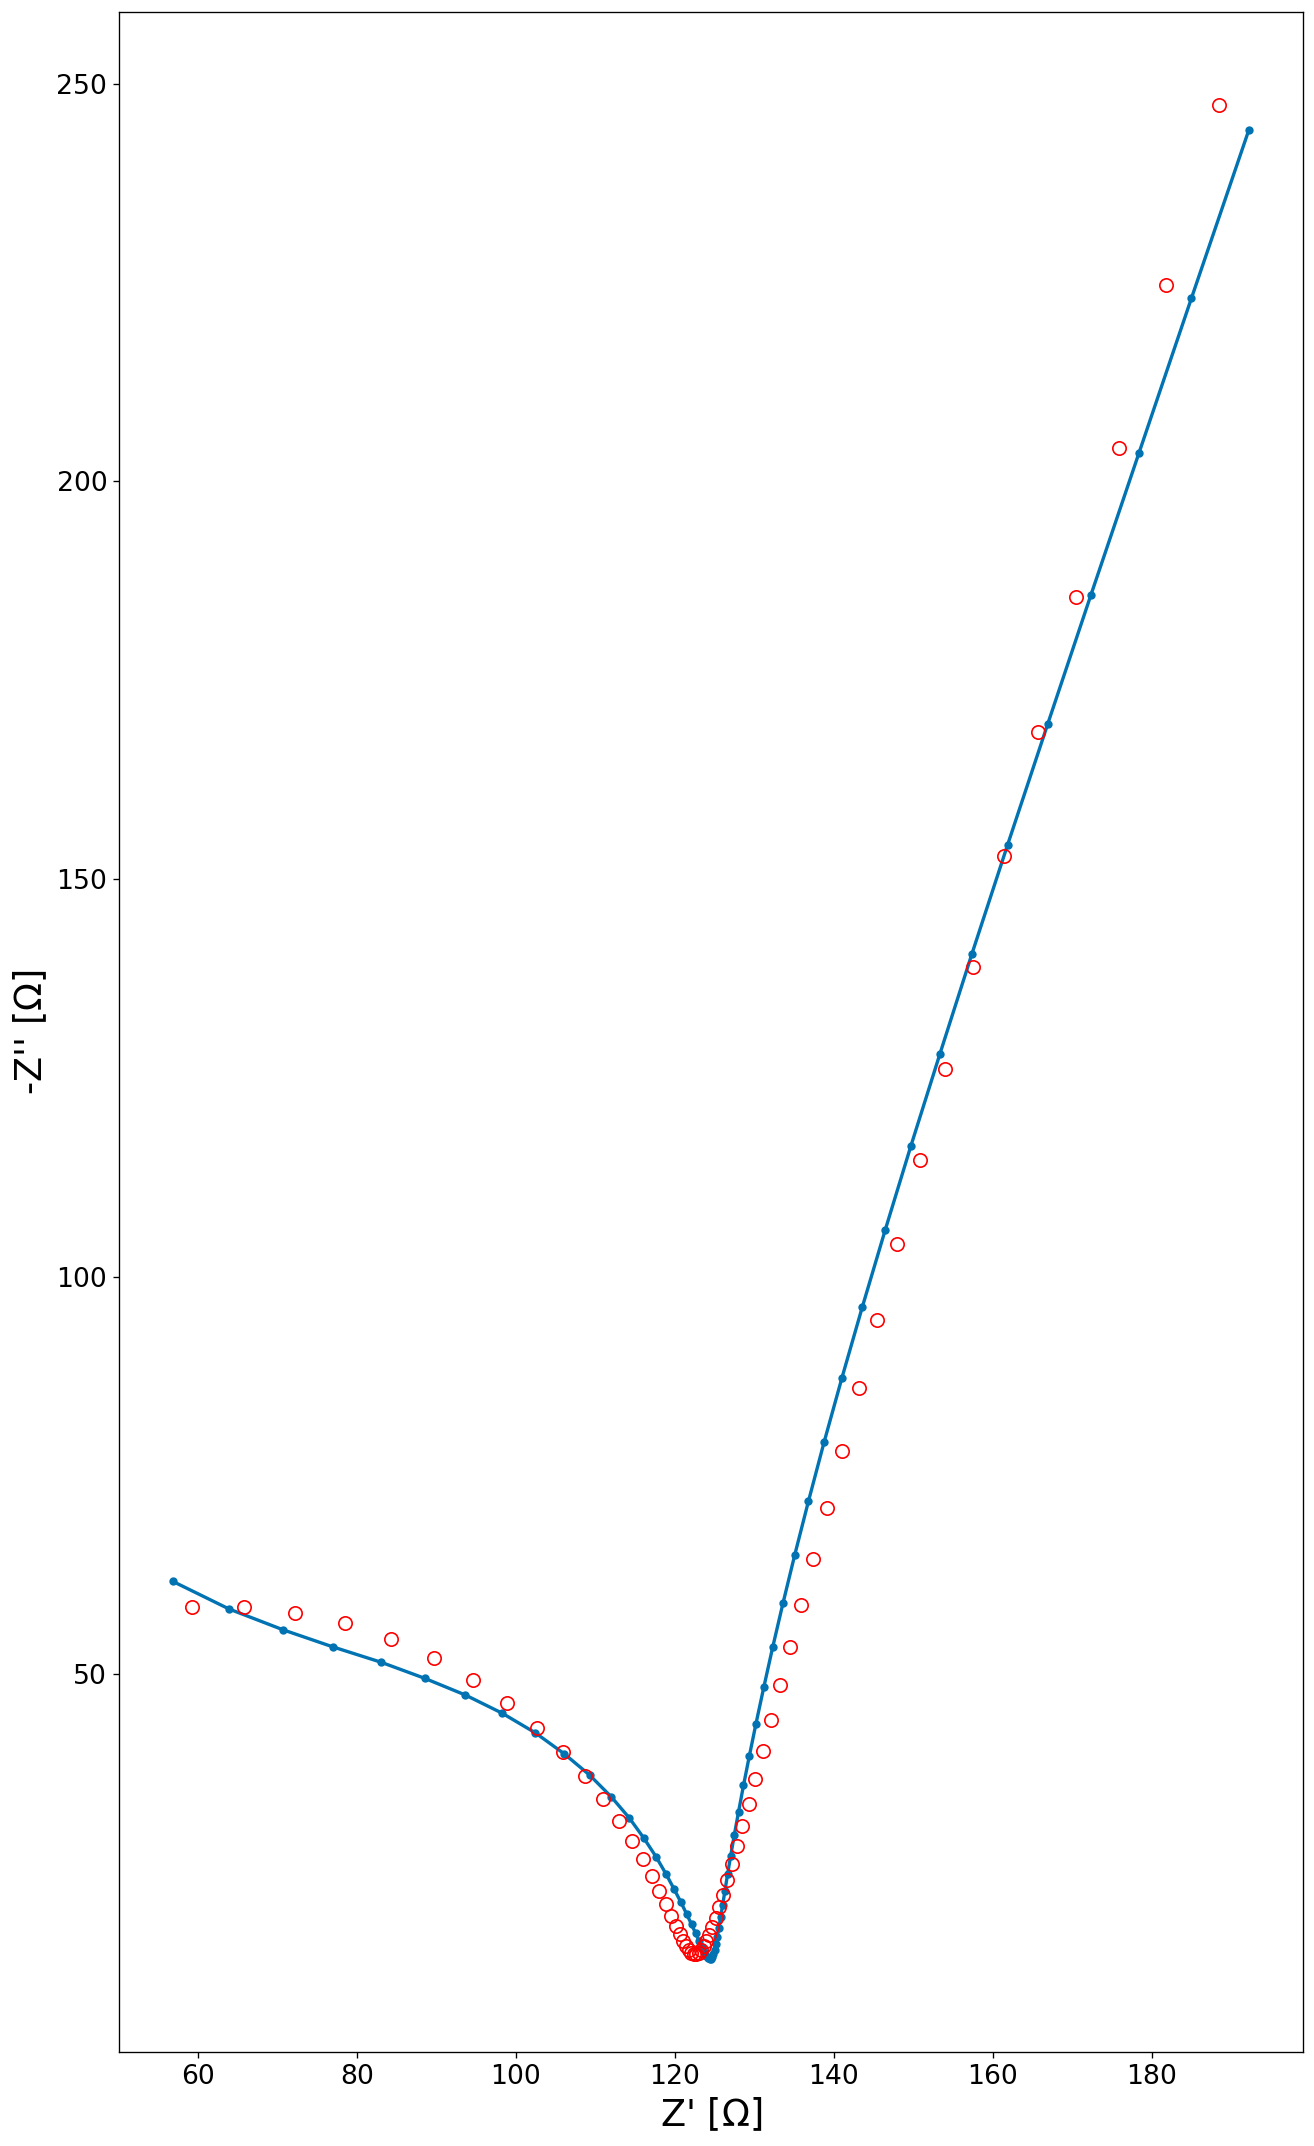

In [82]:
guesser(masked_mpt)

In [ ]:
masked_mpt.mpt_plot(fitting = 'on')